## Ordinary Least squares (OLS) Regression

### Data considerations for OLS
- To ensure that your results are valid for OLS linear regression, consider the following principles while collecting the data, performing the analysis and interpreting the results.
- The independent variables can either be continuous or categorical.  
    -> Continuous variables are usually measured on a scale and can take on any numerical form including fractional and decimal values.  
    -> Categorical variables are values that can be put into countable distinct groups based on a characteristic.
       
- The dependent variable should be continuous. If its not we would have to use a different kind of regression analysis. 

### How OLS fits the Best Line
- Regression explains the variation in a dependent variable for a given set of independent variables.
- It predicts the dependent variable(output) for a given set of independent variables(input).

#### Observed and Fitted Values
- Observed values are the values of the independent variables that are recorded during the study or experiment.
- These values are denoted using Y.

- Fitted values are the values that the model predicts for the independent variable using the independent variables.
- If you put input values for the independent variable into the regression equation, you obtain the fitted value.
- Predicted value and fitted value are synonyms.

### Residuals (diff b/w observed and fitted values)
- For every observed value of the dependent variable (output), the regression model calculates a corresponding fitted value.
- To understand how well the model fits the data, we need to assess the difference between the observed values and the fitted values.
- These differences represent the error in the model which is known as a Residual.

$$
Residual = Observed Value - Fitted Value
$$
- For a good model, the residuals should be relatively small and unbiased.
- In statistics bias indicates that estimates are too high or too low. Unbiased estimates are correct on average. 

### Sum of Squared Errors(SSE) to find the Best Line
- The goal of regression analysis is to draw a line through the data points (see the scatterplot) that minimizes the overall distance of the points from the line.
- We can draw different potential lines. Some observations will fit the model better or worse than other points, which will vary on the line that we draw.
- To quantify how well the line fits all the data points, OLS regression squares the residuals so they are always positive.
- This produces squared residuals, which are called as squared errors.
- First we obtain the residuals between observed and fitted value by subtracting them and then just square them and sum the squared errors.
$$
SSE = \sum_{i=1}^n (y_i - \hat{y_i})^2 
$$ 
- OLS draws the line that minimizes the sum of squared errors(SSE).


- SSE is a measure of variability. As the points spreads further from the fitted line, SSE increases.
- So for a given data set, smaller SSE values signal that the observations fall closer to fitted values.
- OLS minimizes this value, which means we are getting the best possible line.
- If we draw any line other than the one OLS produces, the SSE would increase - which indicates that the distance between observed and fitted values are growing, which means the model is not good.
    

### Implications of Minimizing SSE
1.  - As OLS calculates squared errors using residuals, the model fitting process ultimately ties back to the residuals very strongly.
    - Residuals are the underlying foundations for how least squares regression fits the model and also determining how good the model is.

2.  - As OLS procedure squares, it has significant ramifications, such as it becomes susceptible to outliers and unusual observations.
    - To minimize the squared errors, OLS facotrs in the unusual observations more heavily than other data points.
    - The result is than an individual outlier can exert a strong influence over the entire model and by itself dramatically change the results.

### Displaying a Regression model on a fitted line plot
Below is the example in python using the `statsmodel` library and plotting the line using `matplotlib`

In [3]:
## import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
## 1. Read the file and create a Data Frame
height_weight_df = pd.read_csv("../../datasets/RegressionAnalysisDatasets/HeightWeight.csv")
height_weight_df.head()

,Height M,Weight kg
0,1.60020,49.441572
1,1.65100,62.595751
2,1.65100,75.749931
3,1.53035,48.987979
4,1.45415,43.091278


In [6]:
## 2. Define predictor and response variables

x = height_weight_df["Height M"] ## Independent or predictor Variable
y = height_weight_df["Weight kg"] ## Dependent or response variable

## 3. Add constant to predictor variables
x = sm.add_constant(x)

In [7]:
## 4. Fit Linear Regression Model
ols_model = sm.OLS(y, x).fit()

In [8]:
## 5. View model summary
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Weight kg   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     85.03
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           1.74e-14
Time:                        07:36:43   Log-Likelihood:                -305.70
No. Observations:                  88   AIC:                             615.4
Df Residuals:                      86   BIC:                             620.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -114.3259     17.443     -6.554      0.000    -149.001     -79.651
Height M     106.5046     11.550      9.221      0.000      83.544     129.465
==============================================================================
Omnibus:                        7.927   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.925
Skew:                           0.733   Prob(JB):                       0.0190
Kurtosis:                       3.119   Cond. No.                         45.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
## get values for regression coefficient
print()
print()

-114.32593252988173
106.50455442148427


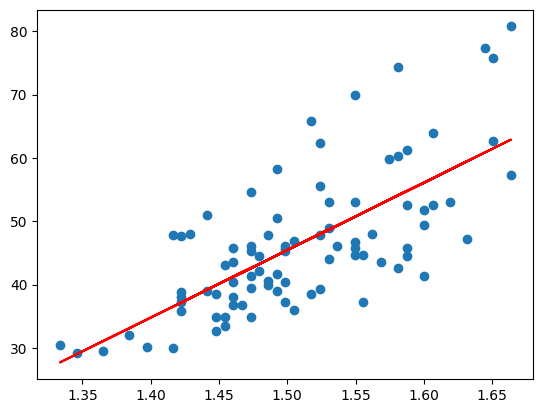

In [35]:
## scatter plot
plt.scatter(x=height_weight_df["Height M"], y=height_weight_df["Weight kg"])


# find the line of best fit using numpy
# m, c = np.polyfit(height_weight_df["Height M"], height_weight_df["Weight kg"], 1)
# print(a, b)

## Line of best fit using model
m, c = ols_model.params["Height M"],  ols_model.params["const"]
## plot the line of best fit

plt.plot(height_weight_df["Height M"], m * height_weight_df["Height M"] + c, color="red")
# plt.scatter(height_weight_df["Height M"], m * height_weight_df["Height M"] + c, color="red")

### Graph Observations
- The above graph shows all the observations with the line of best fit calculated using the regression equation.
- The Y axis shows the dependent variable, that is Weight
- The X axis shows the independent variable , Height
- To get the line we put the full range of height values in the regression equation and get the predicted weight, then draw a line connecting the predicted values(weight).
- This line is the fitted line.
- In this example the line has a poistive slope that corresponds to the positive correlation(0.7) for this data
- The slope of the line equals the coefficient (106.5) which is also called as regression coefficient
- This `coefficient` indicates how much mean weight tends to increase with increase in height.
- Each point on the fitted line represents the mean weight for a given height.
- The distance between each data point and the line is a `residual` for that observation

### Importance of Staying Close to your Data
- The output values that the regression model produces , all the numerical and statistical measures can cause us to lose touch with data.
- We can use graphs and line plots to show the following:
    - The `regression coefficient` in the equation corresponds to the slope of the line
    - For different models,the data points vary arounf the line to a greater or lesser extent, which reflects the precision of the predictions and goodness-of-fit statisitcs like `R-squared`.
    - Does the fitted line fit curvature that is present in the data? NOTE - The fitted line is not always straight.
    - Fitted Line plots make curvature unmistakable.

- As good as line plots are, they can only show simple regression models which contain one independent variable.
- Fitted line plots represent independent variable on X axis and dependent variable on Y-axis, but as the number of independent variable increases, each will require another axis or physical dimension.
- Thus we cannot use fitted line plots for multiple regression.